In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2

In [13]:
image_path = r'D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-000.tif'

with rasterio.open(image_path) as src:
    # 读取图像数据
    image = src.read()
    # 获取图像基本信息
    height = src.height
    width = src.width
    bands = src.count

print("height:",height)
print("width:",width)
print("bands:",bands)

height: 585
width: 163
bands: 1


In [14]:
# 转换为[H, W, C]格式用于显示
image = np.moveaxis(image, 0, -1)
if len(image.shape) > 2:
    image = image.squeeze()
print("squeeze后的shape:",image.shape)

squeeze后的shape: (585, 163)


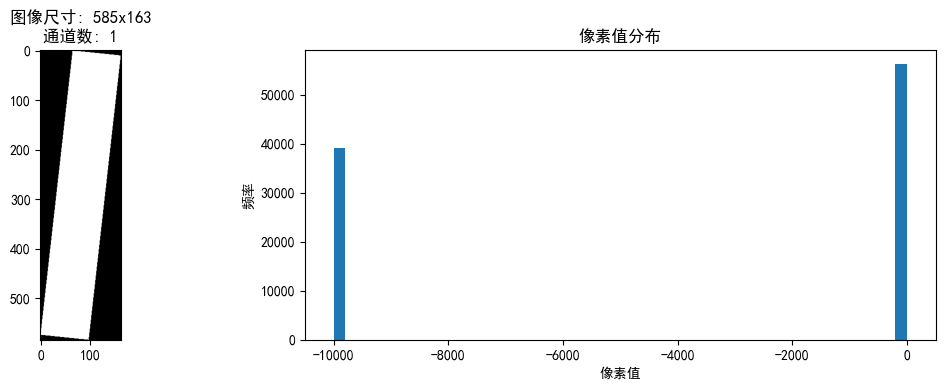

In [15]:
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建图像显示
plt.figure(figsize=(12, 4))

# 显示图像
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title(f'图像尺寸: {height}x{width}\n通道数: {bands}')
plt.axis('on')

# 显示像素值分布
plt.subplot(122)
plt.hist(image.ravel(), bins=50)
plt.title('像素值分布')
plt.xlabel('像素值')
plt.ylabel('频率')

plt.tight_layout()
plt.show()

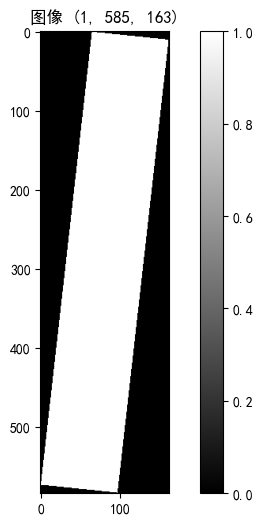

In [16]:
with rasterio.open(image_path) as src:
    # 读取图像数据
    image = src.read()
    
    # 获取数据范围
    min_val = image.min()
    max_val = image.max()

    # 转换为显示格式并归一化到0-1范围
    display = np.moveaxis(image, 0, -1).squeeze()
    display = (display - min_val) / (max_val - min_val)

    plt.figure(figsize=(8, 6))
    plt.imshow(display, cmap='gray')
    plt.title(f'图像 {image.shape}')
    plt.colorbar()
    plt.show()

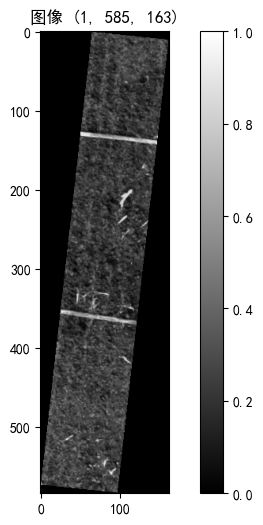

In [17]:
with rasterio.open(image_path) as src:
    # 读取图像数据
    image = src.read()
    
    # 获取nodata值
    nodata = src.nodata
    
    # 创建掩码，排除nodata值（通常是-1000）
    mask = image != nodata if nodata is not None else image != -1000

    # 使用掩码获取有效值的范围
    valid_data = image[mask]
    min_val = valid_data.min()
    max_val = valid_data.max()

    # 转换为显示格式
    display = np.moveaxis(image, 0, -1).squeeze()

    # 将nodata值替换为有效数据的最小值
    display[~mask.squeeze()] = min_val

    # 归一化到0-1范围
    display = (display - min_val) / (max_val - min_val)

plt.figure(figsize=(8, 6))
plt.imshow(display, cmap='gray')
plt.title(f'图像 {image.shape}')
plt.colorbar()
plt.show()

当前图像分辨率: 585 x 163


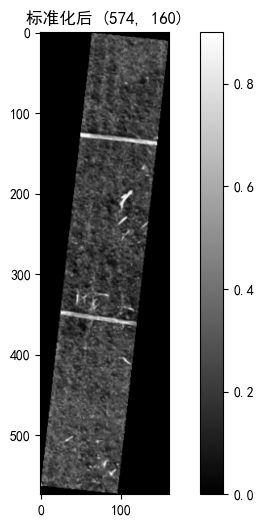

In [18]:
def normalize_resolution(image, target_resolution=(580, 160)):
    """
    将图像降采样到目标分辨率
    Args:
        image: 输入图像 [H, W, C]
        target_resolution: 目标分辨率 (height, width)
    Returns:
        normalized_image: 降采样后的图像
    """
    current_h, current_w = image.shape[:2]
    print(f"当前图像分辨率: {current_h} x {current_w}")
    
    # 计算缩放比例
    scale_h = target_resolution[0] / current_h
    scale_w = target_resolution[1] / current_w
    scale = min(scale_h, scale_w)
    
    # 计算新的尺寸
    new_h = int(current_h * scale)
    new_w = int(current_w * scale)
    
    # 使用双线性插值进行降采样
    normalized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
    return normalized_image

# 标准化分辨率
normalized = normalize_resolution(display, target_resolution=(580, 160))

# 显示标准化后的图像
plt.figure(figsize=(8, 6))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化后 {normalized.shape}')
plt.colorbar()
plt.show()

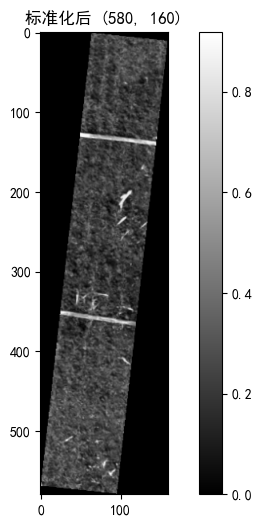

In [19]:
def normalize_resolution(image, target_resolution=(580, 160)):
    """
    将图像降采样到目标分辨率
    Args:
        image: 输入图像 [H, W, C]
        target_resolution: 目标分辨率 (height, width)
    Returns:
        normalized_image: 降采样后的图像
    """
    # 直接使用目标尺寸，不保持宽高比
    normalized_image = cv2.resize(image, (target_resolution[1], target_resolution[0]), 
                                interpolation=cv2.INTER_LINEAR)
    return normalized_image

target_resolution=(580, 160)
normalized = normalize_resolution(display, target_resolution)

# 显示标准化后的图像
plt.figure(figsize=(8, 6))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化后 {normalized.shape}')
plt.colorbar()
plt.show()

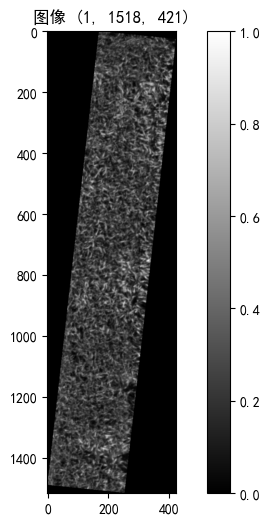

In [20]:
image_path = r'd:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240417-RedEdge-022.tif'

with rasterio.open(image_path) as src:
    # 读取图像数据
    image = src.read()
    
    # 获取nodata值
    nodata = src.nodata
    
    # 创建掩码，排除nodata值（通常是-1000）
    mask = image != nodata if nodata is not None else image != -1000

    # 使用掩码获取有效值的范围
    valid_data = image[mask]
    min_val = valid_data.min()
    max_val = valid_data.max()

    # 转换为显示格式
    display = np.moveaxis(image, 0, -1).squeeze()

    # 将nodata值替换为有效数据的最小值
    display[~mask.squeeze()] = min_val

    # 归一化到0-1范围
    display = (display - min_val) / (max_val - min_val)

plt.figure(figsize=(8, 6))
plt.imshow(display, cmap='gray')
plt.title(f'图像 {image.shape}')
plt.colorbar()
plt.show()

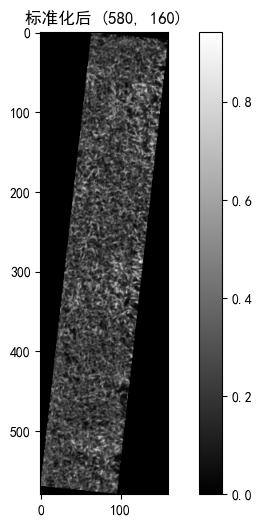

In [21]:
def normalize_resolution(image, target_resolution=(580, 160)):
    """
    将图像降采样到目标分辨率
    Args:
        image: 输入图像 [H, W, C]
        target_resolution: 目标分辨率 (height, width)
    Returns:
        normalized_image: 降采样后的图像
    """
    # 直接使用目标尺寸，不保持宽高比
    normalized_image = cv2.resize(image, (target_resolution[1], target_resolution[0]), 
                                interpolation=cv2.INTER_LINEAR)
    return normalized_image

target_resolution=(580, 160)
normalized = normalize_resolution(display, target_resolution)

# 显示标准化后的图像
plt.figure(figsize=(8, 6))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化后 {normalized.shape}')
plt.colorbar()
plt.show()

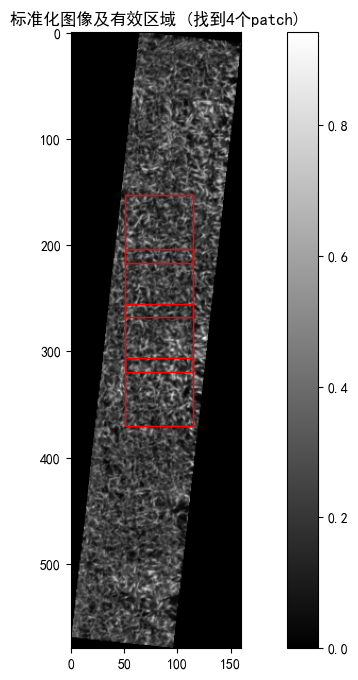

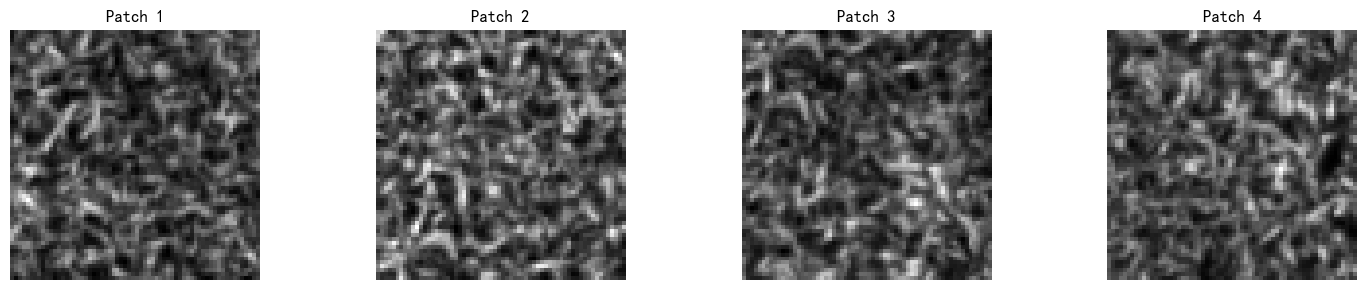

In [22]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2):
    """
    将图像裁剪成小块，只保留完全无空白的区域
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    for y in range(0, h - patch_size[0] + 1, stride_h):
        for x in range(0, w - patch_size[1] + 1, stride_w):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
            
            # 检查patch是否完全有效（无空白）
            if np.all(patch_mask):
                patches.append(patch)
                positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(5, len(patches))
    plt.figure(figsize=(15, 3))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

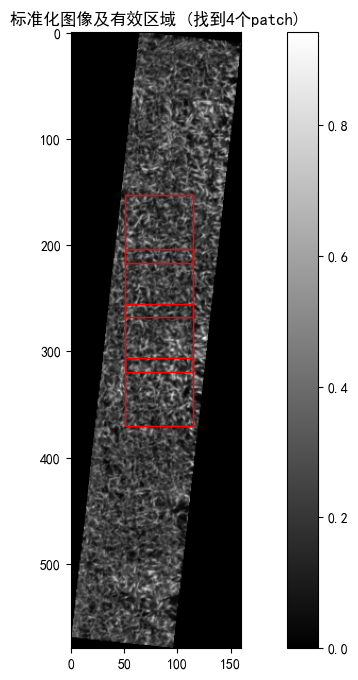

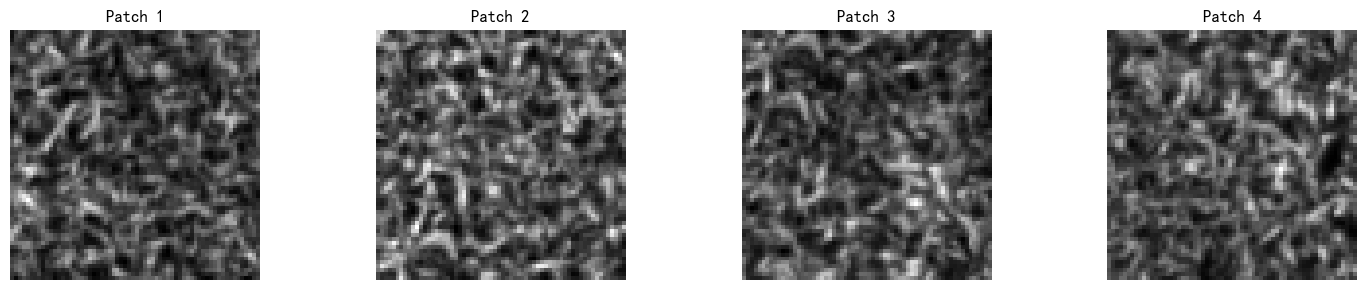

In [23]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95):
    """
    将图像裁剪成小块，保留基本无空白的区域
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 使用滑动窗口
    for y in range(0, h - patch_size[0] + 1, stride_h):
        for x in range(0, w - patch_size[1] + 1, stride_w):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
            
            # 计算有效像素比例
            valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
            
            # 检查边界区域
            border_valid = True
            border_width = 2  # 边界检查宽度
            
            # 检查上下边界
            for i in range(border_width):
                if np.any(patch[i, :] == 0) or np.any(patch[-i-1, :] == 0):
                    border_valid = False
                    break
            
            # 检查左右边界
            for j in range(border_width):
                if np.any(patch[:, j] == 0) or np.any(patch[:, -j-1] == 0):
                    border_valid = False
                    break
            
            # 如果满足条件则保存
            if valid_ratio >= valid_threshold and border_valid:
                patches.append(patch)
                positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95)

# 可视化结果（其余代码保持不变）
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(5, len(patches))
    plt.figure(figsize=(15, 3))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [24]:
# 保存生成的patches为tif文件
base_name = Path(image_path).stem
output_dir = Path('patches')
output_dir.mkdir(parents=True, exist_ok=True)

for i, patch in enumerate(patches):
    # 构建文件名
    filename = output_dir / f"{base_name}_patch{i:03d}.tif"
    # 定义文件的元数据
    profile = {
        'driver': 'GTiff',
        'height': patch.shape[0],
        'width': patch.shape[1],
        'count': 1,  # 单波段图像
        'dtype': patch.dtype,
        'crs': None,  # 若有地理参考信息，这里替换为相应的CRS
        'transform': rasterio.Affine(1, 0, 0, 0, -1, 0)  # 简单的仿射变换，可根据实际情况修改
    }
    # 保存patch为tif文件
    with rasterio.open(filename, 'w', **profile) as dst:
        dst.write(patch, 1)

d:\software\tool_code\anaconda3\envs\qgis\Lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [25]:
input_dir = Path(r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024")
output_dir = Path(r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches")
output_dir.mkdir(parents=True, exist_ok=True)

# 使用第一个图像找到有效位置
first_image = next(input_dir.glob('*.tif'))

first_image

WindowsPath('D:/work/DATA/DATA_TS4GPC/processed/clip_CXZ_WN_2024/CXZ-WN-240130-Blue-000.tif')

In [26]:
# 使用 for 循环迭代生成器对象
for file_path in input_dir.glob('*.tif'):
    # 在这里处理每个文件路径
    print(file_path)

D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-000.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-001.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-002.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-003.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-004.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-005.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-006.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-007.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-008.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-009.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-010.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\CXZ-WN-240130-Blue-011.tif
D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024\

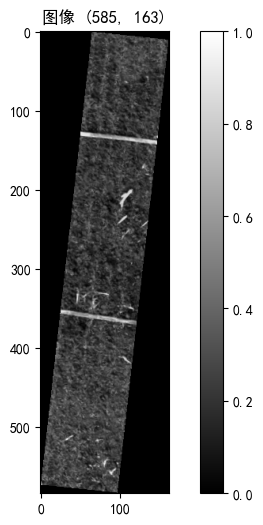

In [27]:
def read_image(image_path):
    with rasterio.open(image_path) as src:
        # 读取图像数据
        image = src.read()
        
        # 获取nodata值
        nodata = src.nodata
        
        # 创建掩码，排除nodata值（通常是-1000）
        mask = image != nodata if nodata is not None else image != -1000

        # 使用掩码获取有效值的范围
        valid_data = image[mask]
        min_val = valid_data.min()
        max_val = valid_data.max()

        # 转换为显示格式
        display = np.moveaxis(image, 0, -1).squeeze()

        # 将nodata值替换为有效数据的最小值
        display[~mask.squeeze()] = min_val

        # 归一化到0-1范围
        display = (display - min_val) / (max_val - min_val)
        return display
    
display = read_image(first_image)

plt.figure(figsize=(8, 6))
plt.imshow(display, cmap='gray')
plt.title(f'图像 {display.shape}')
plt.colorbar()
plt.show()

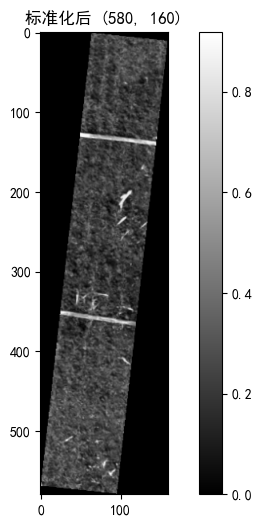

In [28]:
def normalize_resolution(image, target_resolution=(580, 160)):
    """
    将图像降采样到目标分辨率
    Args:
        image: 输入图像 [H, W, C]
        target_resolution: 目标分辨率 (height, width)
    Returns:
        normalized_image: 降采样后的图像
    """
    # 直接使用目标尺寸，不保持宽高比
    normalized_image = cv2.resize(image, (target_resolution[1], target_resolution[0]), 
                                interpolation=cv2.INTER_LINEAR)
    return normalized_image

target_resolution=(580, 160)
normalized = normalize_resolution(display, target_resolution)

# 显示标准化后的图像
plt.figure(figsize=(8, 6))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化后 {normalized.shape}')
plt.colorbar()
plt.show()

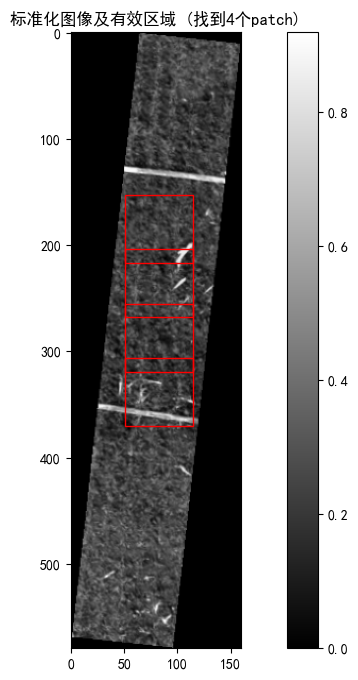

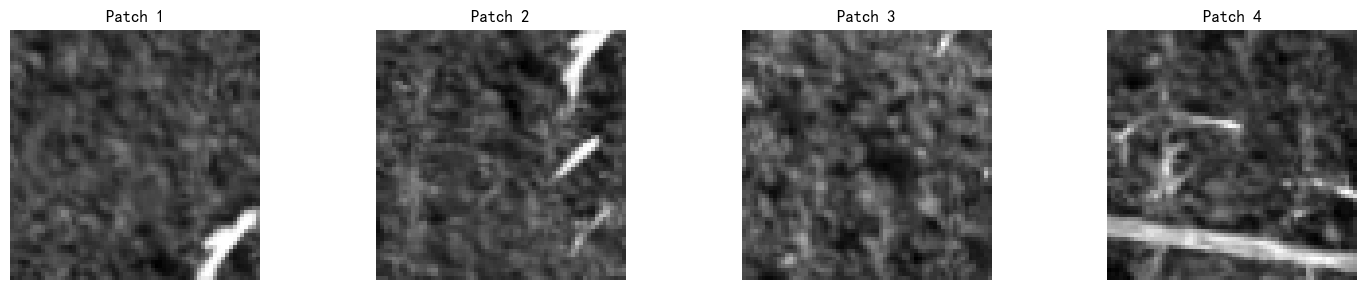

In [29]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95):
    """
    将图像裁剪成小块，保留基本无空白的区域
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 使用滑动窗口
    for y in range(0, h - patch_size[0] + 1, stride_h):
        for x in range(0, w - patch_size[1] + 1, stride_w):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
            
            # 计算有效像素比例
            valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
            
            # 检查边界区域
            border_valid = True
            border_width = 2  # 边界检查宽度
            
            # 检查上下边界
            for i in range(border_width):
                if np.any(patch[i, :] == 0) or np.any(patch[-i-1, :] == 0):
                    border_valid = False
                    break
            
            # 检查左右边界
            for j in range(border_width):
                if np.any(patch[:, j] == 0) or np.any(patch[:, -j-1] == 0):
                    border_valid = False
                    break
            
            # 如果满足条件则保存
            if valid_ratio >= valid_threshold and border_valid:
                patches.append(patch)
                positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95)

# 可视化结果（其余代码保持不变）
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(5, len(patches))
    plt.figure(figsize=(15, 3))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

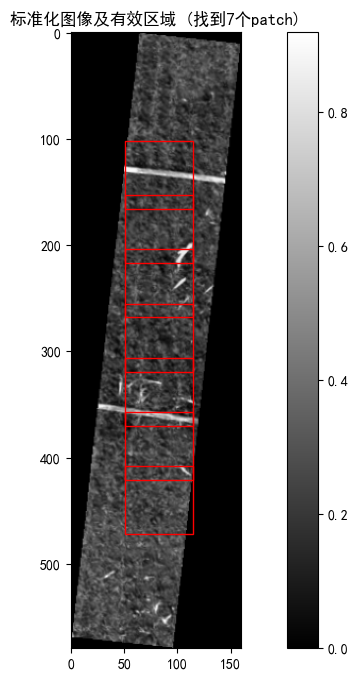

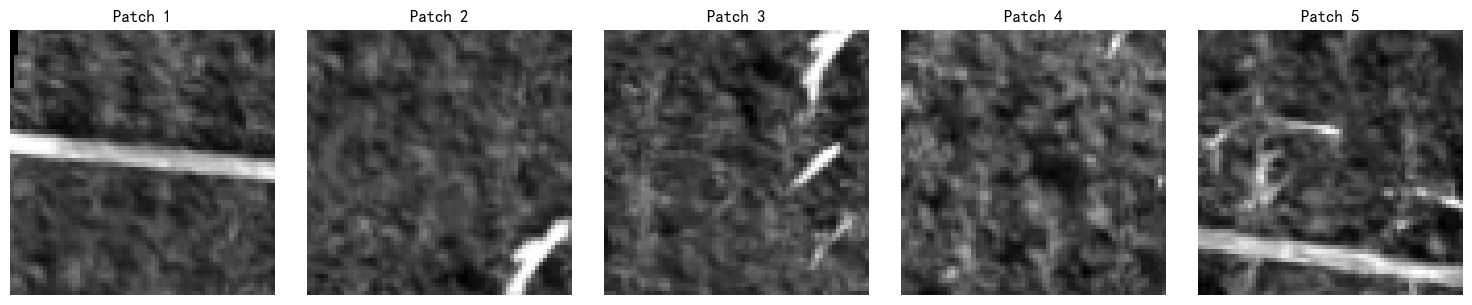

In [30]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.5, valid_threshold=0.85):
    """
    将图像裁剪成小块，保留基本无空白的区域
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 使用滑动窗口
    for y in range(0, h - patch_size[0] + 1, stride_h):
        for x in range(0, w - patch_size[1] + 1, stride_w):
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
            
            # 计算有效像素比例
            valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
            
            # 计算patch的质量指标
            if valid_ratio >= valid_threshold:
                # 计算patch的标准差，确保patch不是纯背景
                patch_std = np.std(patch)
                if patch_std > 0.05:  # 添加标准差阈值
                    patches.append(patch)
                    positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95)

# 可视化结果（其余代码保持不变）
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(5, len(patches))
    plt.figure(figsize=(15, 3))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

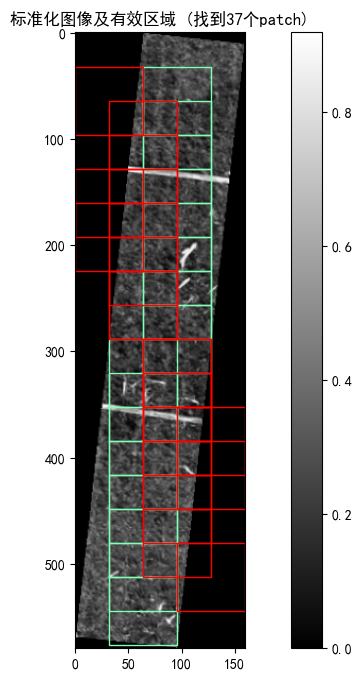

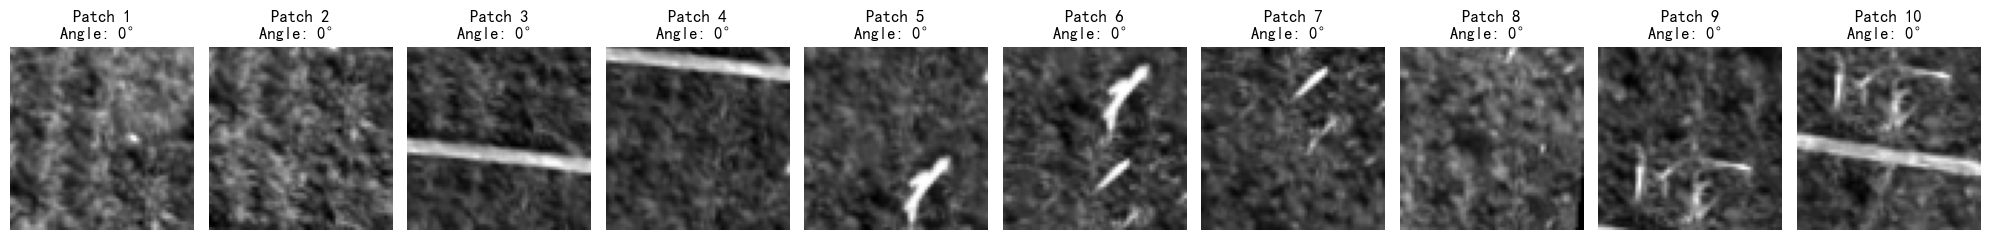

In [34]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99, angle_step=15):
    """
    将图像裁剪成小块，支持倾斜采样
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    angles = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 估计主要倾斜角度（根据图像来看大约是15度）
    base_angle = 15
    angle_range = range(-angle_step, angle_step + 1, angle_step)
    
    for angle in angle_range:
        current_angle = base_angle + angle
        
        # 创建旋转矩阵
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, current_angle, 1.0)
        rotated_image = cv2.warpAffine(image, M, (w, h))
        rotated_mask = cv2.warpAffine(mask.astype(np.uint8), M, (w, h)).astype(bool)
        
        # 在旋转后的图像上进行滑动窗口采样
        for y in range(0, h - patch_size[0] + 1, stride_h):
            for x in range(0, w - patch_size[1] + 1, stride_w):
                patch = rotated_image[y:y + patch_size[0], x:x + patch_size[1]]
                patch_mask = rotated_mask[y:y + patch_size[0], x:x + patch_size[1]]
                
                # 计算有效像素比例
                valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
                
                # 计算patch的质量指标
                if valid_ratio >= valid_threshold:
                    patch_std = np.std(patch)
                    if patch_std > 0.05:
                        patches.append(patch)
                        positions.append((y, x))
                        angles.append(current_angle)
    
    return patches, positions, angles

# 对标准化后的图像进行裁剪
patches, positions, angles = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.5, valid_threshold=0.99)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置，使用不同颜色表示不同角度
for (y, x), angle in zip(positions, angles):
    # 根据角度设置不同的颜色
    color = plt.cm.rainbow(angle / 30 + 0.5)  # 将角度映射到颜色
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor=color, linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}\nAngle: {angles[i]}°')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

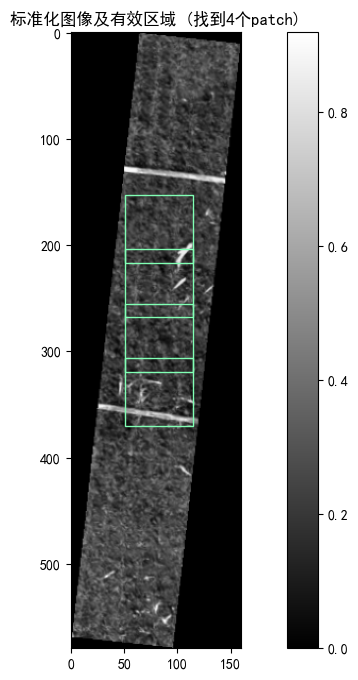

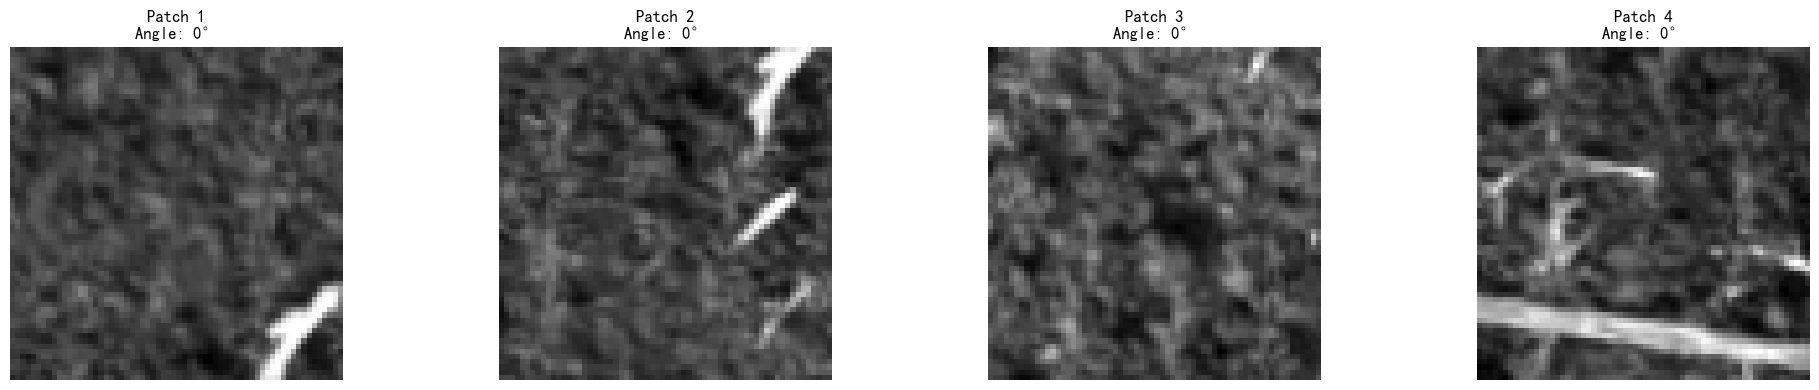

In [35]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99, angle_step=15):
    """
    将图像裁剪成小块，支持倾斜采样并旋转回正常方向
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 估计主要倾斜角度
    base_angle = 15
    angle_range = range(-angle_step, angle_step + 1, angle_step)
    
    for angle in angle_range:
        current_angle = base_angle + angle
        
        # 创建旋转矩阵
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, current_angle, 1.0)
        rotated_image = cv2.warpAffine(image, M, (w, h))
        rotated_mask = cv2.warpAffine(mask.astype(np.uint8), M, (w, h)).astype(bool)
        
        # 在旋转后的图像上进行滑动窗口采样
        for y in range(0, h - patch_size[0] + 1, stride_h):
            for x in range(0, w - patch_size[1] + 1, stride_w):
                patch = rotated_image[y:y + patch_size[0], x:x + patch_size[1]]
                patch_mask = rotated_mask[y:y + patch_size[0], x:x + patch_size[1]]
                
                # 计算有效像素比例
                valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
                
                # 严格过滤空白区域
                if valid_ratio >= valid_threshold:
                    # 将patch旋转回正常方向
                    M_back = cv2.getRotationMatrix2D((patch_size[0]//2, patch_size[1]//2), -current_angle, 1.0)
                    rotated_patch = cv2.warpAffine(patch, M_back, (patch_size[0], patch_size[1]))
                    
                    # 检查旋转后的patch是否包含空白边界
                    if not np.any(rotated_patch == 0):
                        patch_std = np.std(rotated_patch)
                        if patch_std > 0.05:
                            patches.append(rotated_patch)
                            positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置，使用不同颜色表示不同角度
for (y, x), angle in zip(positions, angles):
    # 根据角度设置不同的颜色
    color = plt.cm.rainbow(angle / 30 + 0.5)  # 将角度映射到颜色
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor=color, linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}\nAngle: {angles[i]}°')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

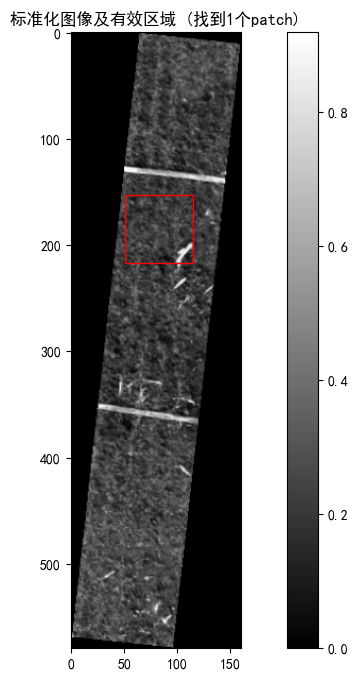

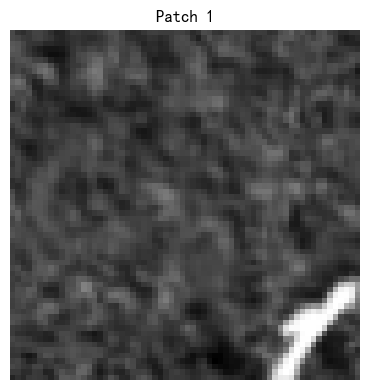

In [36]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99):
    """
    将图像裁剪成小块，沿着图像主方向采样
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 主方向倾斜角度（根据图像估计约15度）
    angle = 15
    
    # 计算倾斜后的采样点
    for y in range(0, h - patch_size[0], stride_h):
        # 根据y位置计算x的偏移
        x_offset = int(y * np.tan(np.deg2rad(angle)))
        
        # 在每一行上采样
        for x in range(max(0, x_offset), min(w - patch_size[1], w + x_offset), stride_w):
            # 调整采样位置以适应倾斜
            adjusted_x = x - x_offset
            if adjusted_x < 0 or adjusted_x + patch_size[1] > w:
                continue
                
            patch = image[y:y + patch_size[0], adjusted_x:adjusted_x + patch_size[1]]
            patch_mask = mask[y:y + patch_size[0], adjusted_x:adjusted_x + patch_size[1]]
            
            # 计算有效像素比例
            valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
            
            # 严格过滤空白和边界区域
            if valid_ratio >= valid_threshold:
                # 检查边界是否包含空白
                border_valid = True
                border_width = 2
                
                # 检查上下左右边界
                for i in range(border_width):
                    if (np.any(patch[i, :] == 0) or 
                        np.any(patch[-i-1, :] == 0) or
                        np.any(patch[:, i] == 0) or
                        np.any(patch[:, -i-1] == 0)):
                        border_valid = False
                        break
                
                if border_valid:
                    patch_std = np.std(patch)
                    if patch_std > 0.05:
                        patches.append(patch)
                        positions.append((y, adjusted_x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

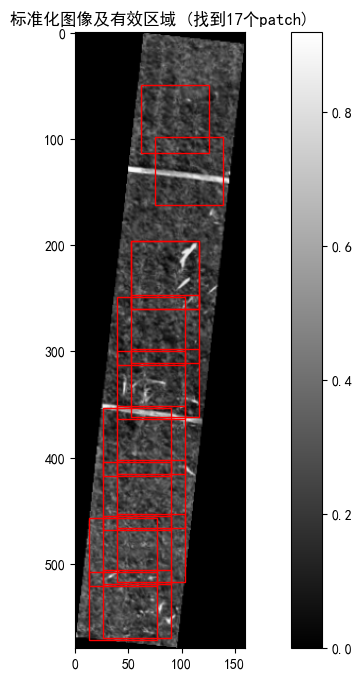

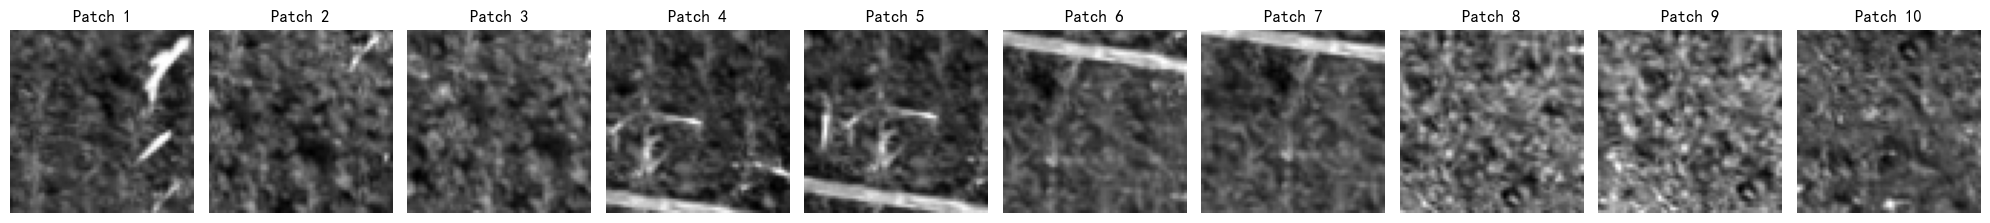

In [37]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99):
    """
    将图像裁剪成小块，沿着图像主方向采样
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 主方向倾斜角度（根据图像估计约15度）
    angle = 15
    angle_rad = np.deg2rad(angle)
    
    # 计算倾斜方向的起始点
    start_points = []
    
    # 从左边界生成起始点
    for y in range(0, h - patch_size[0], stride_h):
        start_points.append((y, 0))
    
    # 从上边界生成起始点
    x_step = int(stride_w * np.cos(angle_rad))
    for x in range(0, w - patch_size[1], x_step):
        start_points.append((0, x))
    
    # 从每个起始点沿倾斜方向采样
    for start_y, start_x in start_points:
        y = start_y
        x = start_x
        
        while y + patch_size[0] <= h and x + patch_size[1] <= w:
            patch = image[y:y + patch_size[0], x:x + patch_size[1]]
            patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
            
            # 计算有效像素比例
            valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
            
            # 检查是否包含空白
            if valid_ratio >= valid_threshold and not np.any(patch == 0):
                # 计算patch的标准差，确保不是均匀区域
                patch_std = np.std(patch)
                if patch_std > 0.05:
                    patches.append(patch)
                    positions.append((y, x))
            
            # 沿倾斜方向移动
            y += int(stride_h * np.cos(angle_rad))
            x += int(stride_w * np.sin(angle_rad))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

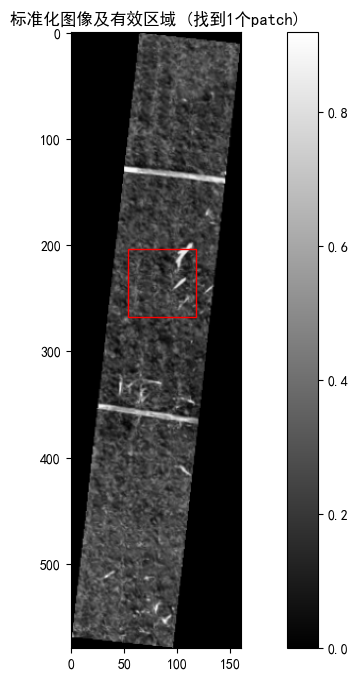

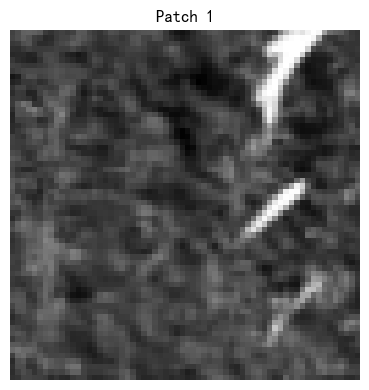

In [38]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99):
    """
    将图像裁剪成小块，沿着图像主方向采样，确保均匀分布
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 主方向倾斜角度（根据图像估计约15度）
    angle = 15
    
    # 计算图像中心线
    center_x = w // 2
    
    # 创建网格采样点
    grid_points = []
    
    # 计算垂直方向的采样数量
    num_vertical = (h - patch_size[0]) // stride_h + 1
    
    # 均匀分布采样点
    for i in range(num_vertical):
        y = i * stride_h
        
        # 计算该行的x偏移（考虑倾斜角度）
        x_offset = int(y * np.tan(np.deg2rad(angle)))
        
        # 计算该行可以放置的patch数量
        effective_width = w - patch_size[1]
        if effective_width <= 0:
            continue
            
        # 在该行上均匀分布采样点
        num_horizontal = min(3, effective_width // stride_w + 1)  # 限制每行最多3个点
        
        if num_horizontal <= 0:
            continue
            
        # 计算水平方向的步长，确保覆盖整个有效区域
        effective_stride_w = effective_width // (num_horizontal - 1) if num_horizontal > 1 else effective_width
        
        for j in range(num_horizontal):
            # 计算基于中心线的x坐标
            if num_horizontal == 1:
                x = center_x - patch_size[1] // 2 + x_offset
            else:
                x = j * effective_stride_w + x_offset
                
            # 确保x在有效范围内
            x = max(0, min(x, w - patch_size[1]))
            
            grid_points.append((y, x))
    
    # 从每个网格点采样
    for y, x in grid_points:
        patch = image[y:y + patch_size[0], x:x + patch_size[1]]
        patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
        
        # 计算有效像素比例
        valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
        
        # 检查是否包含空白
        if valid_ratio >= valid_threshold and not np.any(patch == 0):
            # 计算patch的标准差，确保不是均匀区域
            patch_std = np.std(patch)
            if patch_std > 0.05:
                patches.append(patch)
                positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

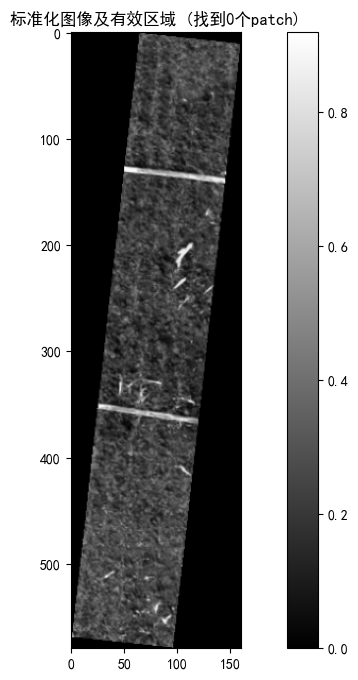

In [39]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95):
    """
    将图像裁剪成小块，沿着图像主方向采样，确保均匀分布
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    stride_w = int(patch_size[1] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 主方向倾斜角度（根据图像估计约15度）
    angle = 15
    
    # 使用简单的滑动窗口策略，但考虑倾斜
    for y in range(0, h - patch_size[0], stride_h):
        # 计算该行的x偏移（考虑倾斜角度）
        x_offset = int(y * np.tan(np.deg2rad(angle)))
        
        # 计算该行的起始和结束x坐标
        start_x = max(0, x_offset)
        end_x = min(w - patch_size[1], w + x_offset)
        
        # 在该行上均匀分布采样点
        if end_x > start_x:
            # 计算该行可以放置的patch数量
            num_patches = max(1, (end_x - start_x) // stride_w)
            
            # 均匀分布采样点
            for i in range(num_patches):
                x = start_x + i * stride_w
                
                # 调整x坐标以适应倾斜
                adjusted_x = max(0, min(x - x_offset, w - patch_size[1]))
                
                patch = image[y:y + patch_size[0], adjusted_x:adjusted_x + patch_size[1]]
                patch_mask = mask[y:y + patch_size[0], adjusted_x:adjusted_x + patch_size[1]]
                
                # 计算有效像素比例
                valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
                
                # 检查是否包含空白，使用更宽松的条件
                if valid_ratio >= valid_threshold:
                    # 计算patch的标准差，确保不是均匀区域
                    patch_std = np.std(patch)
                    if patch_std > 0.03:  # 降低标准差阈值
                        patches.append(patch)
                        positions.append((y, adjusted_x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.99)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

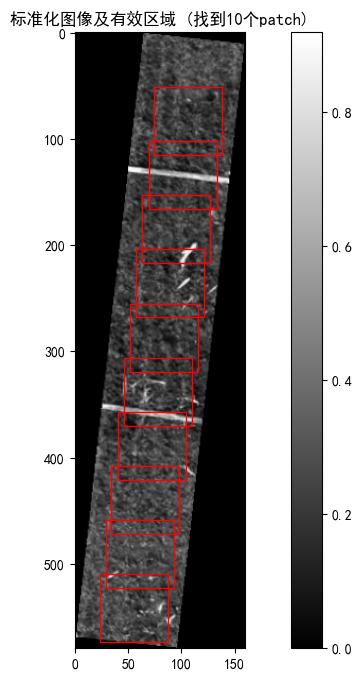

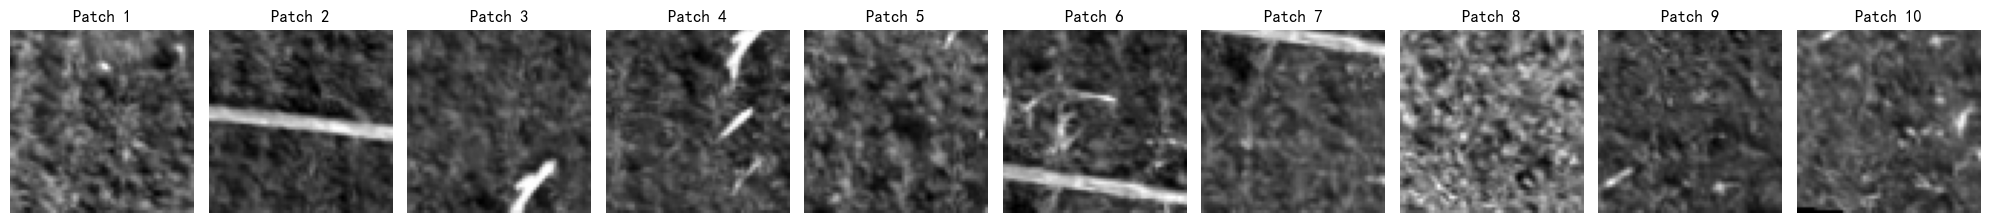

In [40]:
def crop_to_patches(image, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95):
    """
    将图像裁剪成小块，沿着图像中线采样
    """
    h, w = image.shape[:2]
    stride_h = int(patch_size[0] * (1 - overlap))
    
    patches = []
    positions = []
    
    # 计算非零区域的掩码
    mask = ~(image == 0)
    
    # 找出每一行的有效区域范围
    midline_points = []
    
    # 先计算出图像的中线位置
    for y in range(0, h - patch_size[0] + 1, stride_h):
        # 获取当前行的掩码
        row_mask = mask[y:y+1, :].squeeze()
        if np.sum(row_mask) > 0:  # 确保该行有有效像素
            # 找出该行的有效区域起始和结束位置
            valid_indices = np.where(row_mask)[0]
            start_x, end_x = valid_indices[0], valid_indices[-1]
            
            # 计算中点位置
            mid_x = (start_x + end_x) // 2
            
            # 确保patch完全在图像内
            mid_x = max(patch_size[1] // 2, min(mid_x, w - patch_size[1] // 2))
            
            midline_points.append((y, mid_x - patch_size[1] // 2))
    
    # 沿着中线采样patches
    for y, x in midline_points:
        patch = image[y:y + patch_size[0], x:x + patch_size[1]]
        patch_mask = mask[y:y + patch_size[0], x:x + patch_size[1]]
        
        # 计算有效像素比例
        valid_ratio = np.sum(patch_mask) / (patch_size[0] * patch_size[1])
        
        # 检查是否符合要求
        if valid_ratio >= valid_threshold:
            patch_std = np.std(patch)
            if patch_std > 0.03:
                patches.append(patch)
                positions.append((y, x))
    
    return patches, positions

# 对标准化后的图像进行裁剪
patches, positions = crop_to_patches(normalized, patch_size=(64, 64), overlap=0.2, valid_threshold=0.95)

# 可视化结果
plt.figure(figsize=(12, 8))
plt.imshow(normalized, cmap='gray')
plt.title(f'标准化图像及有效区域 (找到{len(patches)}个patch)')

# 在原图上标注有效patch的位置
for y, x in positions:
    rect = plt.Rectangle((x, y), 64, 64, fill=False, edgecolor='red', linewidth=1)
    plt.gca().add_patch(rect)

plt.colorbar()
plt.show()

# 显示部分patch示例
if patches:
    n_show = min(10, len(patches))
    plt.figure(figsize=(20, 4))
    for i in range(n_show):
        plt.subplot(1, n_show, i+1)
        plt.imshow(patches[i], cmap='gray')
        plt.title(f'Patch {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [31]:
positions

[(153, 51), (204, 51), (255, 51), (306, 51)]

In [35]:
# 保存生成的patches为tif文件
def save_patches_as_tif(patches, image_path,output_dir):
    base_name = Path(image_path).stem
    output_dir.mkdir(parents=True, exist_ok=True)

    for i, patch in enumerate(patches):
        # 构建文件名
        filename = output_dir / f"{base_name}_patch{i:03d}.tif"
        # 定义文件的元数据
        profile = {
            'driver': 'GTiff',
            'height': patch.shape[0],
            'width': patch.shape[1],
            'count': 1,  # 单波段图像
            'dtype': patch.dtype,
            'crs': None,  # 若有地理参考信息，这里替换为相应的CRS
            'transform': rasterio.Affine(1, 0, 0, 0, -1, 0)  # 简单的仿射变换，可根据实际情况修改
        }
        # 保存patch为tif文件
        with rasterio.open(filename, 'w', **profile) as dst:
            dst.write(patch, 1)

input_dir = Path(r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024")
output_dir = Path(r"D:\work\DATA\DATA_TS4GPC\processed\clip_CXZ_WN_2024_patches")
output_dir.mkdir(parents=True, exist_ok=True)
image_path = first_image

save_patches_as_tif(patches,image_path,output_dir)

d:\software\tool_code\anaconda3\envs\qgis\Lib\site-packages\rasterio\__init__.py:378: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
